In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict

from utils import *

In [2]:
precursor_info_path = './dataset/precursor_info.tsv'
matrix_path = './dataset/matrix_mz_prob_mean_var.npy'
output_dir = './dataset_statistics'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

precursor_df = pd.read_csv(precursor_info_path, sep='\t')
matrix = np.load(matrix_path, allow_pickle=True)
probabilities = matrix[:, :, 1].copy()
peak_mask = np.zeros((matrix.shape[0], matrix.shape[1]), dtype=bool)
for i in range(matrix.shape[0]):
    seq_len = len(precursor_df['sequence'][i])
    charge = precursor_df['charge'][i]
    mask = get_ion_mask(seq_len, charge, 40)
    peak_mask[i, :] = mask
assert matrix[:, :, 1][~peak_mask].max() < 1e-8
probabilities[~peak_mask] = -1

In [3]:
precursor_df

,precursor_index,sequence,charge,num_PSMs,sequence_length,original_precursor_index
0,0,AAAAAAAAAAAAAAAGAGAGAK,2,1151,22,0
1,1,AAAAAAAAAAAAAAAASAGGK,2,25,21,1
2,2,AAAAAAAAAAAAAAAASAGGK,3,29,21,2
3,3,AAAAAAAAAAAAAAAGAGAGAK,3,1736,22,3
4,4,AAAAAAAAAAAAAAATAASAAASAILGGR,3,65,29,4
...,...,...,...,...,...,...
610112,610112,YYYWAVNPQDR,2,207,11,632069
610113,610113,YYYYER,2,48,6,632070
610114,610114,YYYYHR,3,517,6,632071
610115,610115,YYYYMWK,2,38,7,632072


In [4]:
# make dataset for huggingface
huggingface_data_dir = "/home/flower/Data/ms_workspace/fragment_prediction/huggingface_data"
columns = ['precursor_index', 'peptide', 'charge', '#PSM', 'peptide_length'] + frag_ion_names
data = np.concatenate([precursor_df[['precursor_index', 'sequence', 'charge', 'num_PSMs', 'sequence_length']].values, probabilities], axis=1)
data = pd.DataFrame(data, columns=columns)
data

,precursor_index,peptide,charge,#PSM,peptide_length,"(a, 1, 2)","(b, 1, 1)","(b, 1, 2)","(b, 1, 3)","(b, 1, 4)",...,"(y, 3, 30)","(y, 3, 31)","(y, 3, 32)","(y, 3, 33)","(y, 3, 34)","(y, 3, 35)","(y, 3, 36)","(y, 3, 37)","(y, 3, 38)","(y, 3, 39)"
0,0,AAAAAAAAAAAAAAAGAGAGAK,2,1151,22,0.414422,0.0,0.685491,0.910513,0.950478,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,AAAAAAAAAAAAAAAASAGGK,2,25,21,0.92,0.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2,AAAAAAAAAAAAAAAASAGGK,3,29,21,1.0,0.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,3,AAAAAAAAAAAAAAAGAGAGAK,3,1736,22,0.881336,0.0,0.906682,0.964286,0.97523,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,4,AAAAAAAAAAAAAAATAASAAASAILGGR,3,65,29,0.661538,0.0,0.8,0.953846,0.984615,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610112,610112,YYYWAVNPQDR,2,207,11,1.0,0.009662,1.0,0.859903,0.468599,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
610113,610113,YYYYER,2,48,6,1.0,0.083333,1.0,0.166667,0.020833,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
610114,610114,YYYYHR,3,517,6,1.0,0.324952,0.988395,0.03675,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
610115,610115,YYYYMWK,2,38,7,1.0,0.105263,1.0,0.894737,0.052632,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [5]:
combined_frag_ion_to_col_idx = defaultdict(list)
for i, frag_ion in enumerate(frag_ion_names):
    ion, charge, length = frag_ion
    combined_frag_ion_to_col_idx[(ion, charge)].append(i)
combined_frag_ion_list = sorted(combined_frag_ion_to_col_idx.keys(), key=lambda x: (x[0], x[1]))
filtered_data_combined_frag_ion = []
for frag_ion in combined_frag_ion_list:
    frag_ion_idx = combined_frag_ion_to_col_idx[frag_ion]
    frag_ion_prob = probabilities[:, frag_ion_idx].copy().flatten()
    frag_ion_prob = frag_ion_prob[frag_ion_prob != -1]
    filtered_data_combined_frag_ion.append(frag_ion_prob)
mean_prob_list = [np.mean(data) for data in filtered_data_combined_frag_ion]

In [6]:
combined_frag_ion_to_globel_prob = {('a', 1): 0.7665177569534634, ('b', 1): 0.3298608808924297, ('b', 2): 0.09521035398694312, ('y', 1): 0.6553384357499908, ('y', 2): 0.22122918684265158, ('b', 3): 0.04281567135150584, ('y', 3): 0.07287503624014437} 
globel_prob_list = [combined_frag_ion_to_globel_prob[i] for i in combined_frag_ion_list]


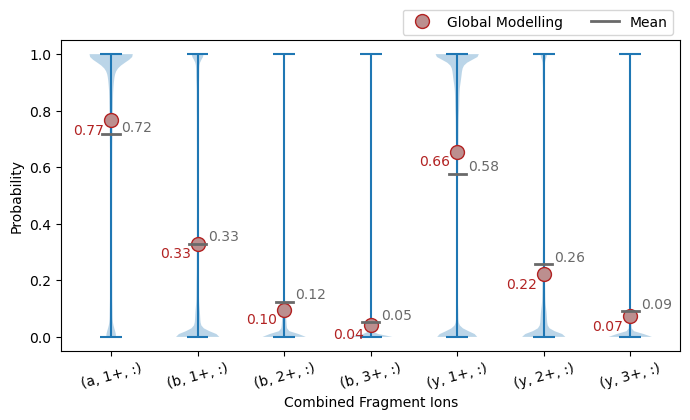

In [7]:
plt.figure(figsize=(7, 4))
plt.violinplot(filtered_data_combined_frag_ion, showmeans=False, showmedians=False)
# plot a big circle for the globel prob
for i, prob in enumerate(globel_prob_list):
    if i == 0:
        plt.plot(i + 1, prob, 'o', color='rosybrown', markersize=10, label='Global Modelling', markeredgecolor='firebrick')
    else:
        plt.plot(i + 1, prob, 'o', color='rosybrown', markersize=10, markeredgecolor='firebrick')
    plt.text(i + 0.74, prob-0.05, f"{prob:.2f}", ha='center', fontsize=10, color='firebrick')
for i, prob in enumerate(mean_prob_list):
    if i == 0:
        plt.plot([i + 0.9, i + 1.1], [prob, prob], color='dimgray', linewidth=2, label='Mean')
    else:
        plt.plot([i + 0.9, i + 1.1], [prob, prob], color='dimgray', linewidth=2)
    plt.text(i + 1.3, prob+0.01, f"{prob:.2f}", ha='center', fontsize=10, color='dimgray')
plt.xticks(range(1, len(combined_frag_ion_list) + 1), [f"({frag_ion[0]}, {frag_ion[1]}+, :)" for frag_ion in combined_frag_ion_list], rotation=15)
plt.ylabel('Probability')
plt.xlabel('Combined Fragment Ions')

# plt.title('Combined Fragment Ion Probability Distribution')
plt.tight_layout()
# show legend in the center of the top outside of the plot
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.12), ncol=2, fontsize=10, frameon=True)
plt.savefig(os.path.join(output_dir, 'combined_frag_ion_prob_dist.png'), dpi=300)
plt.show()

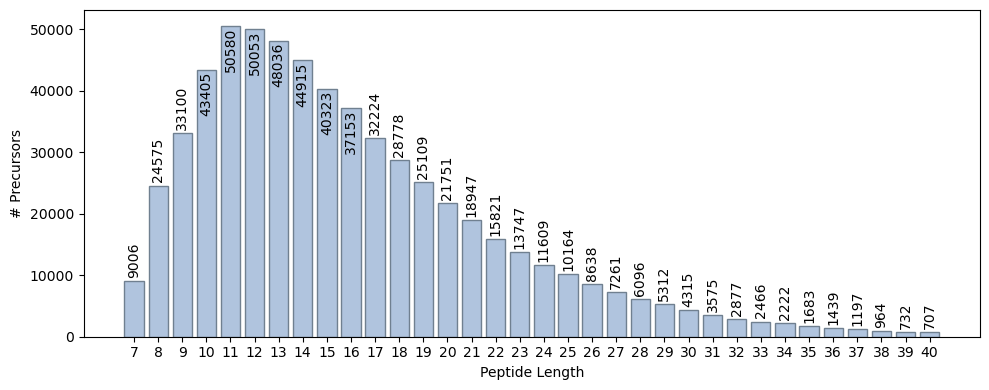

In [8]:
# plot the histogram of the precursor peptide length
from collections import Counter

plt.figure(figsize=(10, 4))
counter = Counter(precursor_df['sequence_length'])
counter.pop(6)
lengths = sorted(counter.keys())
counts = [counter[length] for length in lengths]
plt.bar(lengths, counts, color='lightsteelblue', edgecolor='slategrey', width=0.8)
# show the value of each bar
for i, count in enumerate(counts):
    if count > 35000:
        plt.text(lengths[i], count - 7500, str(count), ha='center', va='bottom', rotation=90, color='black')
    else:
        plt.text(lengths[i], count + 500, str(count), ha='center', va='bottom', rotation=90, color='black')
plt.xlabel('Peptide Length')
plt.ylabel('# Precursors')
# plt.yscale('log')
# plt.title('Precursor Peptide Length Distribution')
plt.xticks(lengths)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'precursor_peptide_length_distribution.png'), dpi=300)
plt.show()


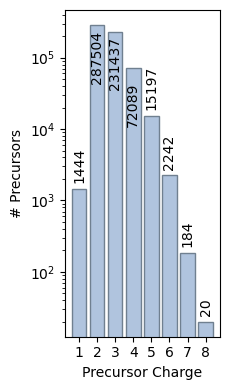

In [9]:
# plot the histogram of the precursor charge
plt.figure(figsize=(2.4, 4))
counter = Counter(precursor_df['charge'])
charges = sorted(counter.keys())
counts = [counter[charge] for charge in charges]
plt.bar(charges, counts, color='lightsteelblue', edgecolor='slategrey', width=0.8)
# show the value of each bar
for i, count in enumerate(counts):
    if count > 30000:
        plt.text(charges[i], count*0.15, str(count), ha='center', va='bottom', rotation=90, color='black')
    else:
        plt.text(charges[i], count*1.2, str(count), ha='center', va='bottom', rotation=90, color='black')
plt.xlabel('Precursor Charge')
plt.ylabel('# Precursors')
plt.yscale('log')
# plt.title('Precursor Charge Distribution')
plt.xticks(charges)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'precursor_charge_distribution.png'), dpi=300)
plt.show()  